# Policy Visualiser
This is an utility to load a checkpoint model and run an evaluation

In [ ]:
import os
import json
import gymnasium as gym
import torch
import matplotlib.pyplot as plt
from IPython.display import clear_output
import curiosity

%env LD_LIBRARY_PATH=:/usr/lib/nvidia:/home/markhaoxiang/.mujoco/mujoco210/bin

## Actor Critic

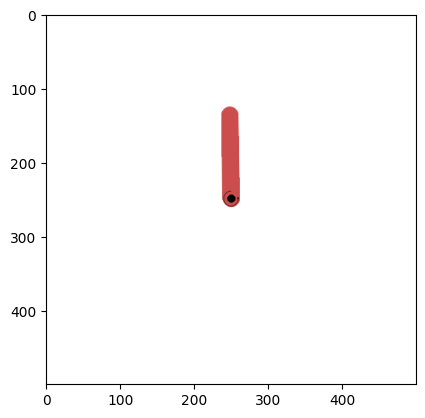

In [3]:
path = "/home/markhaoxiang/Projects/part-ii-project/curiosity/log/ddpg_Pendulum-v1_2023-12-09 07-07-55-649148"
frame = 40000

with open(os.path.join(path, "config.json"),"r") as f:
    config = json.load(f)
actor: torch.nn.Module = torch.load(os.path.join(path, "checkpoint", "actor.pt"))
if not frame is None:
    actor.load_state_dict(torch.load(os.path.join(path, "checkpoint", str(frame), "actor.pt")))

actor = actor.to("cpu")
env = gym.make(config["environment"], render_mode="rgb_array")
obs, _ = env.reset()
terminated = False
truncated = False
policy = lambda x: actor(torch.tensor(x, dtype=torch.float32)).cpu().numpy()

with torch.no_grad():
    while not terminated and not truncated:
        action = policy(obs)
        obs, reward, terminated, truncated, _ = env.step(action)
        clear_output(wait=True)
        plt.imshow(env.render())
        plt.show()